<a href="https://colab.research.google.com/github/matheusbuenowb/Data-Mining-Bee-Colony/blob/main/Atividade_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Bees are essential to the environmental structure of our world, as well as sustaining humanity. Not only are they part of the food chain, they also pollinate as both specialist and generalists. 1/3 of our food source depends on bee pollination. Thus, humans must take more actions to protect these vital insects.
- BeeAudio Dataset is an initiative to encourage computational means of addressing bee population decline, such as through creating machine learning algorithms to remotely and instantly detect the health status of the hive via sound data. This is the largest single dataset of bee audio, alongside multi-dimensional data, and it was all collected with a custom IoT device combining an ESP32 Wi-Fi module, INMP441 microphone module, and a BME280 temperature/humidity sensor.
- All data is original from European Honey Bee hives in California, and it is split in 60 second chunks. There are 7100 samples in total.

link: https://www.kaggle.com/datasets/annajyang/beehive-sounds?select=all_data_updated.csv

#Importação da base de dados


In [1]:
import pandas as pd

df = pd.read_csv("all_data_updated_att.csv")

#Alterações para corrigir alguns dados NaN, deixei comentado

In [2]:


#Selecionar linhas que têm valores nulos em qualquer coluna
#df_nulos = df[df.isnull().any(axis=1)]

#Exibir as linhas com valores nulos
#df = df.drop(columns=['gust speed'])

#df

#df_nulos = df[df.isnull().any(axis=1)]

#df_nulos.count()

#df.info()



In [3]:


#Verifica se há existem valores NaN em todo o DataFrame
#nan_check = df.isna()

#Exibi o df com True para NaN e False para valores válidos
#nan_check



#Conta os valores NaN por coluna
#nan_count = df.isna().sum()

#print(nan_count)



In [4]:
#Substitui os valores nulos pelas médias

#df['weather temp'] = df['weather temp'].fillna(df['weather temp'].mean())
#df['wind speed'] = df['wind speed'].fillna(df['wind speed'].mean())
#df['lat'] = df['lat'].fillna(df['lat'].mean())
#df['long'] = df['long'].fillna(df['long'].mean())

In [5]:
df.count()

,0
device,1275
hive number,1275
date,1275
hive temp,1275
hive humidity,1275
hive pressure,1275
weather temp,1275
weather humidity,1275
weather pressure,1275
wind speed,1275


In [6]:


#Preencher valores NaN com a média de cada coluna numérica
#df = df.fillna(df.mean(numeric_only=True))

#df= df.dropna()


In [7]:
#df.count()

#Aplicando Random Forest

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor N.

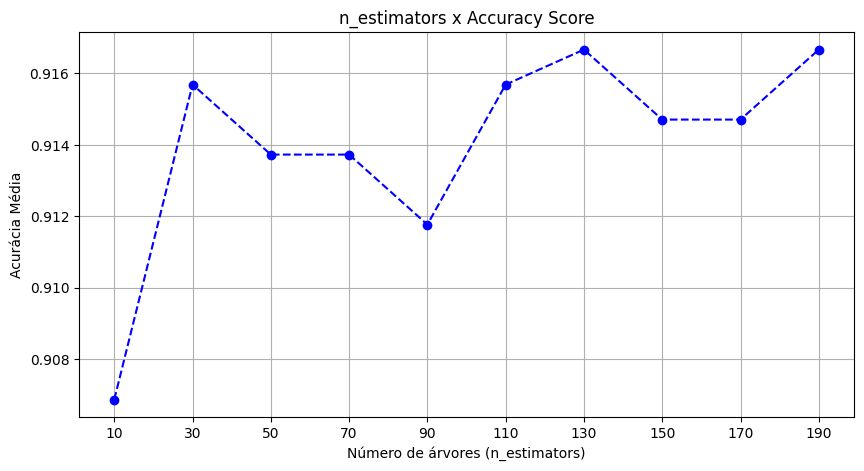

Melhor valor de n_estimators: 130
Acurácia do modelo no conjunto de teste: 0.93
Modelo salvo em 'random_forest_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib  # Para salvar e carregar o modelo


# Tratando valores ausentes
#df = df.dropna()  # Remove linhas com valores nulos (ou use fillna para preencher)

#Selecionando as features (variáveis preditoras)
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']  #Rótulo a ser previsto

#Garante que os dados são numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

#Garante que y contém apenas valores binários (1 ou 0)
y = y.apply(lambda x: 1 if x > 0 else 0)

#Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Avalia diferentes valores de n_estimators, para ver qual seria mais adequado para o modelo
n_estimators_values = range(10, 210, 20)
accuracy_scores = []

for n in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

#Plota os valores de n_estimators vs. Accuracy Score
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de árvores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('n_estimators x Accuracy Score')
plt.xticks(n_estimators_values)
plt.grid()
plt.show()

#Escolhe o melhor n_estimators baseado na maior acurácia
best_n = n_estimators_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de n_estimators: {best_n}")

#Cria o modelo RandomForest com o melhor n_estimators
model = RandomForestClassifier(n_estimators=best_n, random_state=42)

#Treina o modelo com todos os dados de treino
model.fit(X_train, y_train)

#Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

#Avalia o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.2f}")

#Salva o modelo treinado com o joblib
joblib.dump(model, 'random_forest_queen_model.pkl')
print("Modelo salvo em 'random_forest_queen_model.pkl'")

#Carrega o modelo para novas previsões
loaded_model = joblib.load('random_forest_queen_model.pkl')

#Supondo um novo conjunto de dados para teste
new_data = pd.DataFrame({
    'hive temp': [35.0], 'hive humidity': [30.0], 'hive pressure': [1008.0],
    'weather temp': [25.0], 'weather humidity': [50.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})

new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de verão (presença da rainha): {new_prediction[0]}")


#Supondo que esteja no inverno (temperatura bem baixa aliada com uma alta umidade)
#Nete caso a rainha estará ausente

new_data = pd.DataFrame({
    'hive temp': [5.0], 'hive humidity': [80.0], 'hive pressure': [1008.0],
    'weather temp': [-2.0], 'weather humidity': [90.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})


# Fazendo previsões com novos dados
new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de inverno (presença da rainha): {new_prediction[0]}")


#Aplicando KNN

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor de K.

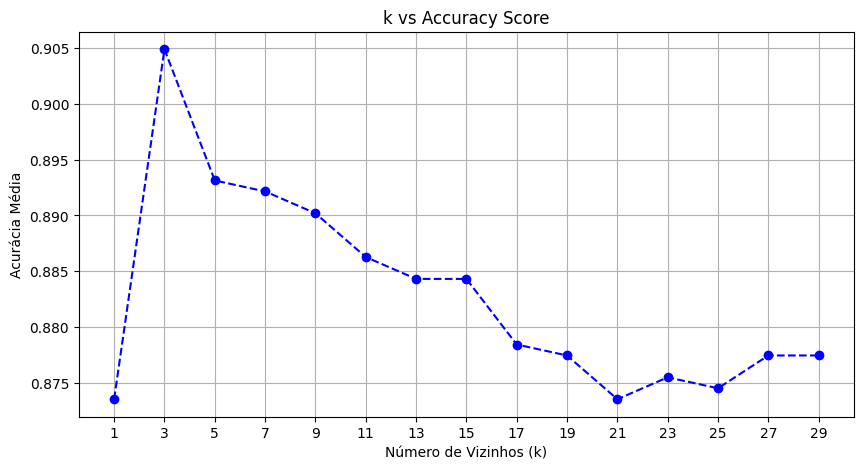

Melhor valor de k: 3
Acurácia do modelo no conjunto de teste: 0.91
Modelo salvo em 'knn_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 1


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib  # Para salvar e carregar o modelo


#Trata valores ausentes
#df = df.dropna()  # Remove linhas com valores nulos

#Seleciona as features (variáveis preditoras)
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']  #rótulo

#GarantE que os dados são numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

#GarantE que y contém apenas valores binários
y = y.apply(lambda x: 1 if x > 0 else 0)

#DVIIDE os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#AVALIA de diferentes valores de k
k_values = range(1, 31, 2)  # Testa valores ímpares de k para evitar empates
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

# Plotando os valores de k vs. Accuracy Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.title('k vs Accuracy Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Escolhendo o melhor k baseado na maior acurácia
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de k: {best_k}")

# Criando o modelo KNN com o melhor k
model = KNeighborsClassifier(n_neighbors=best_k)

# Treinando o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.2f}")

# Salvando o modelo treinado
joblib.dump(model, 'knn_queen_model.pkl')
print("Modelo salvo em 'knn_queen_model.pkl'")

# Carregando o modelo para novas previsões
loaded_model = joblib.load('knn_queen_model.pkl')

#Supondo um novo conjunto de dados para teste
new_data = pd.DataFrame({
    'hive temp': [35.0], 'hive humidity': [30.0], 'hive pressure': [1008.0],
    'weather temp': [25.0], 'weather humidity': [50.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})

new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de verão (presença da rainha): {new_prediction[0]}")


#Supondo que esteja no inverno (temperatura bem baixa aliada com uma alta umidade)
#Para este caso a rainha estará presente

new_data = pd.DataFrame({
    'hive temp': [5.0], 'hive humidity': [80.0], 'hive pressure': [1008.0],
    'weather temp': [-2.0], 'weather humidity': [90.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})


# Fazendo previsões com novos dados
new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de inverno (presença da rainha): {new_prediction[0]}")


#SVM MODEL

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor de C.


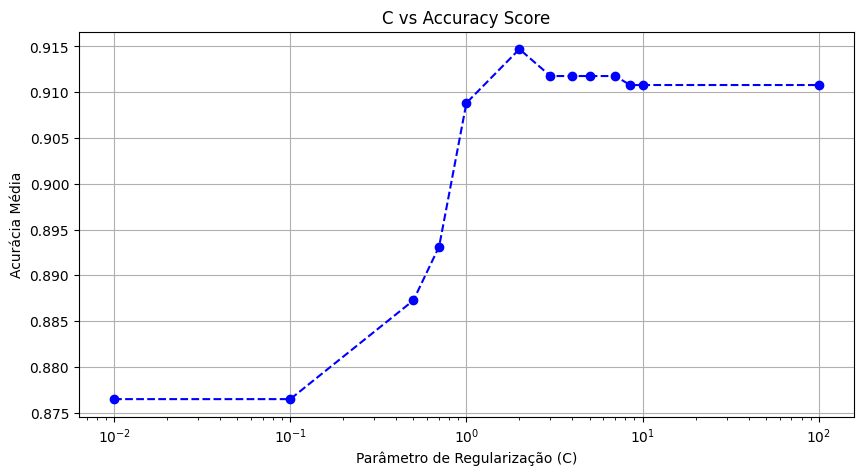

Melhor valor de C: 2
Acurácia do modelo no conjunto de teste: 0.9216
Modelo salvo em 'svm_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 1


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib  # Para salvar e carregar o modelo

# Tratando valores ausentes
#df = df.dropna()  # Remove linhas com valores nulos (ou use fillna para preencher)

# Selecionando as features (variáveis preditoras)
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']  # Rótulo a ser previsto

# Garantindo que os dados são numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Garantindo que y contém apenas valores binários
y = y.apply(lambda x: 1 if x > 0 else 0)

# Dividindo os dados em treino 80% e teste 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliação de diferentes valores de C (parâmetro de regularização)
c_values = [0.01, 0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 7, 8.5, 10, 100]
accuracy_scores = []

for c in c_values:
    model = SVC(C=c, kernel='rbf', random_state=42, gamma = 0.08)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

# Plotando os valores de C vs. Accuracy Score
plt.figure(figsize=(10, 5))
plt.plot(c_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Parâmetro de Regularização (C)')
plt.ylabel('Acurácia Média')
plt.title('C vs Accuracy Score')
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.grid()
plt.show()

#Escolhe o melhor C baseado na maior acurácia
best_c = c_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de C: {best_c}")




'''# Avaliação de diferentes valores de C (parâmetro de regularização)
accuracy_scores_gamma = []
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for gam in gamma_values:
    model = SVC(C=best_c, kernel='rbf', random_state=42, gamma = gam)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores_gamma.append(cv_scores.mean())

# Plotando os valores de C vs. Accuracy Score
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, accuracy_scores_gamma, marker='o', linestyle='dashed', color='b')
plt.xlabel('Parâmetro de Regularização (C)')
plt.ylabel('Acurácia Média')
plt.title('C vs Accuracy Score')
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.grid()
plt.show()


best_gamma = gamma_values[accuracy_scores_gamma.index(max(accuracy_scores_gamma))]
print(f"Melhor valor de gamma: {best_gamma}")'''

#cRIA o modelo SVM com o melhor C
model = SVC(C=best_c, kernel='rbf', random_state=42, probability=True, gamma = 0.08) #0.08

#TREINA o modelo com todos os dados de treino
model.fit(X_train, y_train)

#FAZ previsões no conjunto de teste
y_pred = model.predict(X_test)

#Avalia o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

#Salva o modelo treinado
joblib.dump(model, 'svm_queen_model.pkl')
print("Modelo salvo em 'svm_queen_model.pkl'")

#Carrega o modelo para novas previsões
loaded_model = joblib.load('svm_queen_model.pkl')

#Supondo um novo conjunto de dados para teste
new_data = pd.DataFrame({
    'hive temp': [35.0], 'hive humidity': [30.0], 'hive pressure': [1008.0],
    'weather temp': [25.0], 'weather humidity': [50.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})

new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de verão (presença da rainha): {new_prediction[0]}")


#Supondo que esteja no inverno (temperatura bem baixa aliada com uma alta umidade)
#PARA ESTE MODELO a rainha estará presente

new_data = pd.DataFrame({
    'hive temp': [5.0], 'hive humidity': [80.0], 'hive pressure': [1008.0],
    'weather temp': [-2.0], 'weather humidity': [90.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})


# Fazendo previsões com novos dados
new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de inverno (presença da rainha): {new_prediction[0]}")


In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(scores.mean())

0.9152941176470588


# Modelo do Gradiente Boosting

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor do hiperparâmetro N.

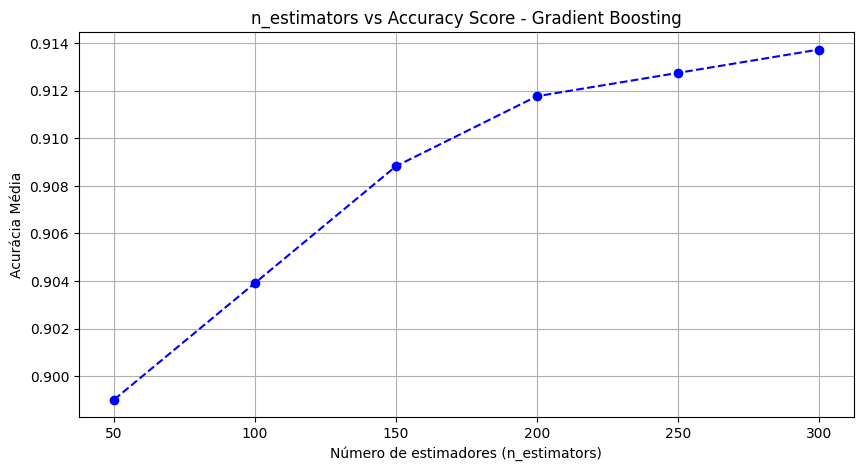

Melhor valor de n_estimators: 300
Acurácia do modelo no conjunto de teste: 0.93
Modelo salvo em 'gradient_boosting_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 0


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib  # Para salvar e carregar o modelo

# Tratando valores ausentes
#df = df.dropna()  # Remove linhas com valores nulos (ou use fillna para preencher)

# Selecionando as features (variáveis preditoras)
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']  # Rótulo a ser previsto

# Garantindo que os dados são numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Garantindo que y contém apenas valores binários
y = y.apply(lambda x: 1 if x > 0 else 0)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#

# Avaliação de diferentes valores de n_estimators

n_estimators_values = range(50, 310, 50)
accuracy_scores = []

for n in n_estimators_values:
    model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

# Plotando os valores de n_estimators vs. Accuracy Score
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('n_estimators vs Accuracy Score - Gradient Boosting')
plt.xticks(n_estimators_values)
plt.grid()
plt.show()

# Escolhendo o melhor n_estimators baseado na maior acurácia
best_n = n_estimators_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de n_estimators: {best_n}")

# Criando o modelo Gradient Boosting com o melhor n_estimators
model = GradientBoostingClassifier(n_estimators=best_n, learning_rate=0.1, random_state=42)

# Treinando o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.2f}")

# Salvando o modelo treinado
joblib.dump(model, 'gradient_boosting_queen_model.pkl')
print("Modelo salvo em 'gradient_boosting_queen_model.pkl'")

# Carregando o modelo para novas previsões
loaded_model = joblib.load('gradient_boosting_queen_model.pkl')

#Supondo um novo conjunto de dados para teste
new_data = pd.DataFrame({
    'hive temp': [35.0], 'hive humidity': [30.0], 'hive pressure': [1008.0],
    'weather temp': [25.0], 'weather humidity': [50.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})

new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de verão (presença da rainha): {new_prediction[0]}")


#Supondo que esteja no inverno (temperatura bem baixa aliada com uma alta umidade)
#Nete caso a rainha estará ausente

new_data = pd.DataFrame({
    'hive temp': [5.0], 'hive humidity': [80.0], 'hive pressure': [1008.0],
    'weather temp': [-2.0], 'weather humidity': [90.0], 'weather pressure': [1013.0],
    'wind speed': [5.0], 'rain': [0]
})


# Fazendo previsões com novos dados
new_prediction = loaded_model.predict(new_data)
print(f"Previsão para novos dados de inverno (presença da rainha): {new_prediction[0]}")

#Possíveis causas para os resultados:

#Random e Gradient: 93 %

- Random Forest e Gradient obtiveram 93% de precisão. Isso pode ter acontecido por serem modelos baseados em árvores, robustos para dados estruturados, conseguindo desta forma uma alta precisão

- Gradient Boosting se adapta melhor a padrões complexos e com pouco ruído.

- Já o Random Forest consegue generalizar melhor dados bastante ruídosos.

# KNN e SVM: 91% e 87% -> 91% (melhorado)

- O KNN obteve 91%, enquanto que o SVM 87%.

- O KNN funciona a partir da proximidade com os k-vizinhos. Sendo assim, aparentemente a distribuição dos dados tem padrões locais bem definidos, o que permite uma boa classificação por proximidade.

- Já o SVM obteve uma pontuação menor. Isto sugere que aparentemente os dados não estão linearmente separáveis da melhor forma com o hiperplano escolhido, fazendo com que o seu desempenho tenha sido inferior.

# Temos algumas possibilidades:

- Overfitting do KNN e SVM: Dado que eles se baseiam em proximidade e margens, podem estar superajustando a padrões do conjunto de treino e não captando corretamente as variações sazonais, resultando em uma acurácia menor.

- Generalização melhor do RF e GB: Como esses modelos usam múltiplas árvores, podem ter captado um padrão global mais robusto, que identifica mudanças sazonais reais.

- Sendo assim, pode-se concluir que um modelo de múltiplas árvores se adapta melhor ao dataset, enquanto que algoritmos baseados em proximidade e margens (como KNN e SVM) tendem a ter um desempenho inferior.


- Impacto das features escolhidas: **hive_temp**, **hive_humidity**,  **hive_pressure**, **weather_temp**, **weather_humidity**, **weather_pressure**, **rain**, **wind_speed**.
- Foram escolhidas as features relacionadas a temperatura, umidade relativa do ar e pressão, tanto de dentro da comeia (hive) como do ambiente externo (weather). Também foram escolhidas a velocidade do vento e a presença ou não de chuva.

#Analisando o peso das features em cada modelo

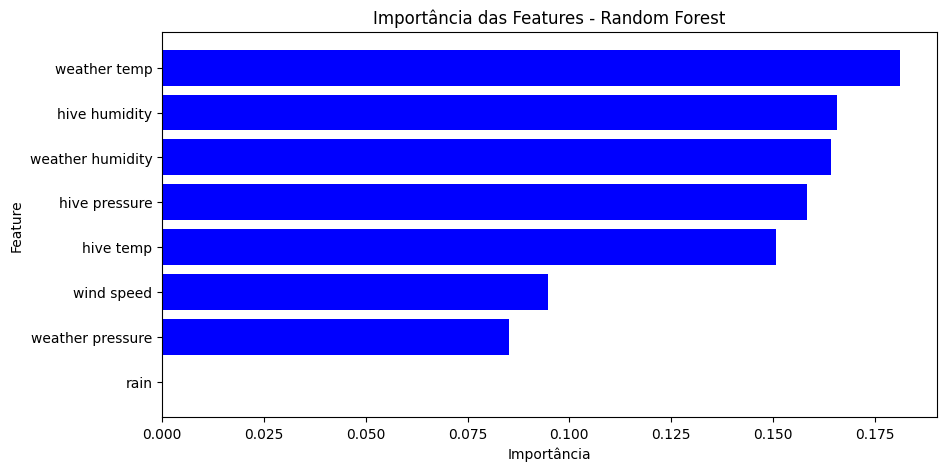

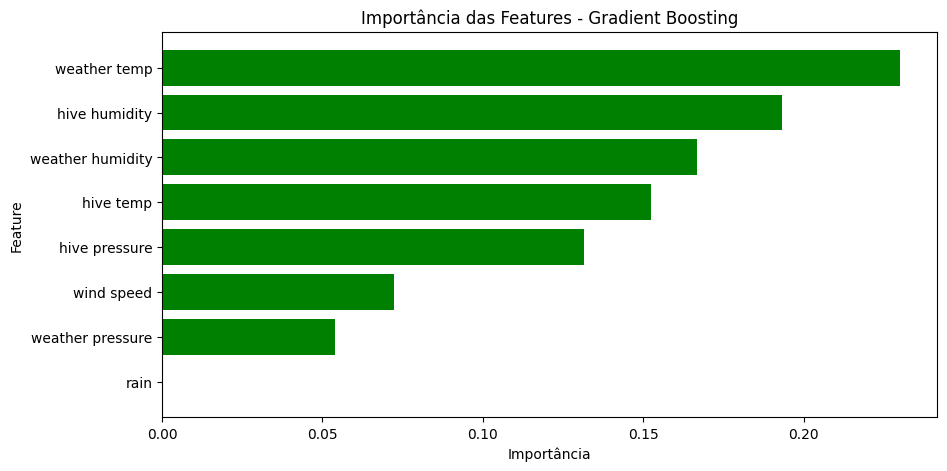

In [13]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

#Carregando o modelo Random Forest e gradient boosting
rf_model2 = joblib.load('/content/gradient_boosting_queen_model.pkl')
rf_model = joblib.load('/content/random_forest_queen_model.pkl')

#Obtendo a importância das features
feature_importances = rf_model.feature_importances_
feature_importances2 = rf_model2.feature_importances_

#Definindo os nomes das features usadas no treinamento
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df2 = pd.DataFrame({'Feature': features, 'Importance': feature_importances2})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)


#Plotando
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()  # Inverte a ordem para ficar da maior para a menor
plt.show()


plt.figure(figsize=(10, 5))
plt.barh(importance_df2['Feature'], importance_df2['Importance'], color='green')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Gradient Boosting')
plt.gca().invert_yaxis()  # Inverte a ordem para ficar da maior para a menor
plt.show()

In [14]:
#Peso das variáveis no Random Forest

print('Peso das variáveis no Random Forest\n', importance_df)


print('\nPeso das variáveis no Gradiente Boosting\n' , importance_df2)

Peso das variáveis no Random Forest
             Feature  Importance
3      weather temp    0.181196
1     hive humidity    0.165754
4  weather humidity    0.164150
2     hive pressure    0.158271
0         hive temp    0.150731
6        wind speed    0.094700
5  weather pressure    0.085199
7              rain    0.000000

Peso das variáveis no Gradiente Boosting
             Feature  Importance
3      weather temp    0.230048
1     hive humidity    0.193174
4  weather humidity    0.166845
0         hive temp    0.152297
2     hive pressure    0.131442
6        wind speed    0.072315
5  weather pressure    0.053880
7              rain    0.000000


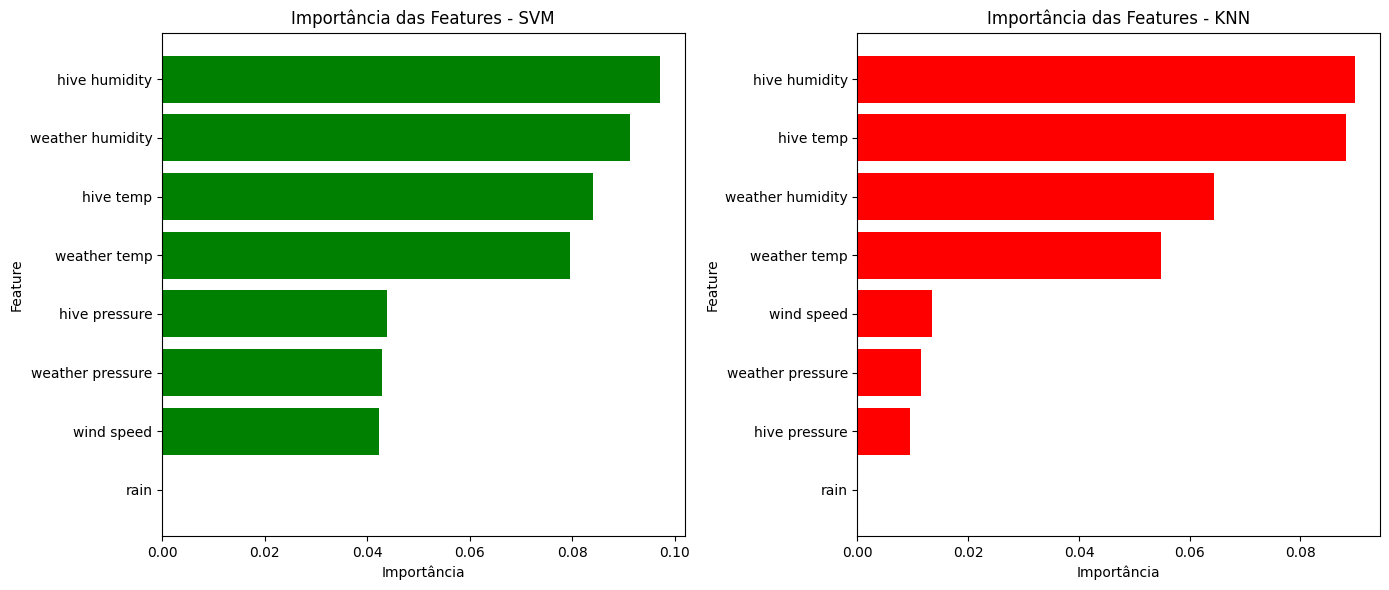

In [15]:
from sklearn.inspection import permutation_importance
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os modelos SVM e KNN
svm_model = joblib.load('svm_queen_model.pkl')
knn_model = joblib.load('knn_queen_model.pkl')

# Carregando o dataset
df = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']

# Calculando a importância das features para o SVM
svm_importance = permutation_importance(svm_model, X, y, scoring='accuracy', random_state=42)
svm_feature_importances = svm_importance.importances_mean

# Calculando a importância das features para o KNN
knn_importance = permutation_importance(knn_model, X, y, scoring='accuracy', random_state=42)
knn_feature_importances = knn_importance.importances_mean

# Criando DataFrame para visualização
importance_df_svm = pd.DataFrame({'Feature': features, 'Importance': svm_feature_importances})
importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)

importance_df_knn = pd.DataFrame({'Feature': features, 'Importance': knn_feature_importances})
importance_df_knn = importance_df_knn.sort_values(by='Importance', ascending=False)

# Plotando as importâncias das features para SVM e KNN
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Gráfico SVM
ax[0].barh(importance_df_svm['Feature'], importance_df_svm['Importance'], color='g')
ax[0].set_xlabel('Importância')
ax[0].set_ylabel('Feature')
ax[0].set_title('Importância das Features - SVM')

#Gráfico KNN
ax[1].barh(importance_df_knn['Feature'], importance_df_knn['Importance'], color='r')
ax[1].set_xlabel('Importância')
ax[1].set_ylabel('Feature')
ax[1].set_title('Importância das Features - KNN')

# Invertendo o eixo Y para exibir a maior importância no topo
for axis in ax:
    axis.invert_yaxis()

plt.tight_layout()
plt.show()


In [16]:
importance_df_knn
#Formato peso de +-30%

,Feature,Importance
1,hive humidity,0.089882
0,hive temp,0.088157
4,weather humidity,0.064314
3,weather temp,0.054745
6,wind speed,0.013490
5,weather pressure,0.011451
2,hive pressure,0.009569
7,rain,0.000000


In [17]:
importance_df_svm
#Formato peso de +-45%



,Feature,Importance
1,hive humidity,0.097098
4,weather humidity,0.091294
0,hive temp,0.084078
3,weather temp,0.079529
2,hive pressure,0.043922
5,weather pressure,0.042980
6,wind speed,0.042353
7,rain,0.000000


#Análise:

- De forma geral, as variáveis relacionadas a temperatura e umidade relativa do ar tiveram maior impacto nos modelos treinados, sendo a temperatura externa a mais impactante nos modelos do Random Forest Classifier e Gradient Boosting. Nos modelos SVM e KNN, a umidade relativa obteve um maior peso.

- A pressão, de forma geral, teve um menor peso em todos os modelos, tanto interna como externa. A velocidade do vento também teve um peso menor.

- A presença ou não de chuva teve um peso nulo.

- Sendo assim, se quisermos aperfeiçoarmos o modelo teríamos que focar nas features relacionadas a temperatura e umidade relativa do ar, ver se seria possível normalizar ainda mais e retirar possíveis outliers.


- Algo estava errado com o modelo SVM, pois os valores do hiperparâmetro C ficavam travados em 87% no treino para diferentes valores C. Creio que o modelo estava se superajustando aos dados e ficando insensível a mudanças. Sendo assim, foi realizado a mudança do parâmetro (ou incluído, não me lembro) gamma que, para pequenos valores, como 0.001, o modelo considera padrões mais gerais, enquanto que, para altos valores, como 10, o modelo considera padrões muito locais (podendo levar a overfitting). Sendo assim, optei pelo valor meio-termo 0.1.

- Mais uma observação: agora a tabela do SVM está funcionando, embora não apresente em formato de 100% os pesos.
